In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [11]:
df = pd.read_csv('C:/Users/prade/Downloads/diabetes.txt', delimiter=',')

In [15]:
df.columns = ['Number_of_times_pregnant', 
'Plasma_glu_conc', 
'Diastolic_blood_pressure',
'Triceps_skin_fold_thickness',
'serum_insulin',
'BMI', 
'Diabetes_pedigree_func',
'Age',
'Class']

In [16]:
df.head()

,Number_of_times_pregnant,Plasma_glu_conc,Diastolic_blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_func,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_times_pregnant,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
Plasma_glu_conc,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
Diastolic_blood_pressure,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
Triceps_skin_fold_thickness,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
serum_insulin,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
BMI,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
Diabetes_pedigree_func,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
Age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
Class,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


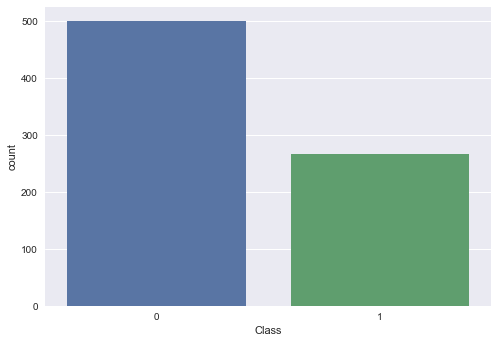

In [20]:
sns.countplot(df['Class'])

In [60]:
cols

Index(['Number_of_times_pregnant', 'Plasma_glu_conc',
       'Diastolic_blood_pressure', 'Triceps_skin_fold_thickness',
       'serum_insulin', 'BMI', 'Diabetes_pedigree_func', 'Age', 'Class'],
      dtype='object')

ValueError: num must be 1 <= num <= 8, not 9

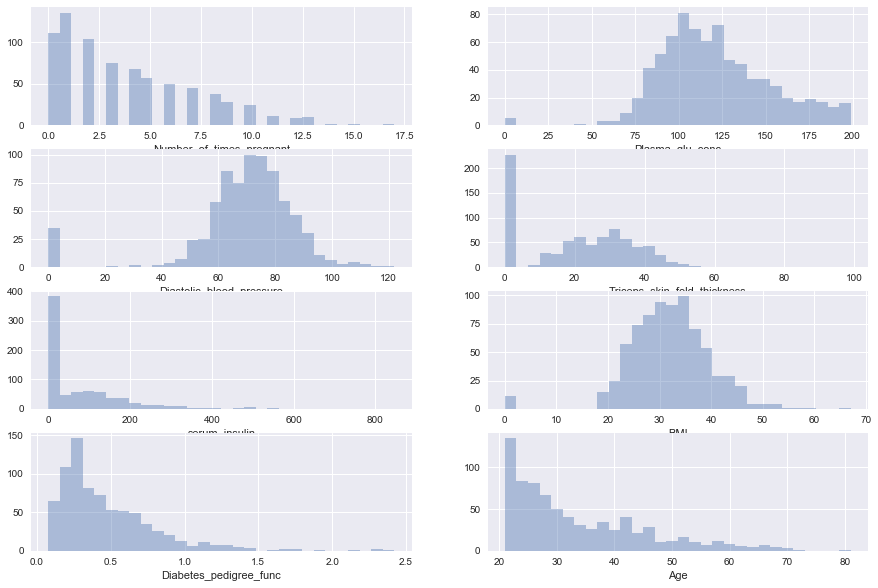

In [64]:
plt.figure(figsize=(15,10))
cols = df.columns
for i in range(len(cols)):
    c = cols[i]
    
    plt.subplot(4,2,i+1)
    ax = sns.distplot(df[cols[i]], bins =30,kde=False)
    

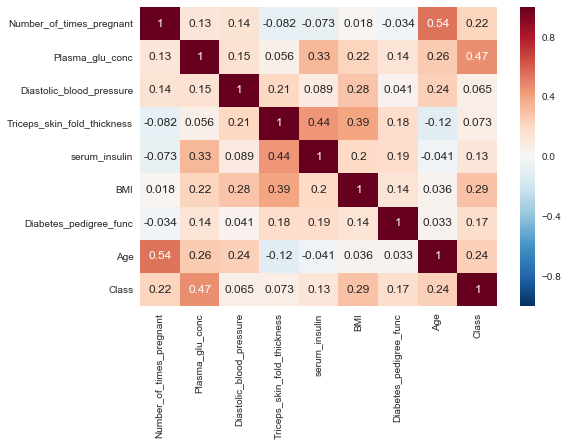

In [65]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [29]:
X = df.drop('Class',axis=1)
y=df['Class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [32]:
model = xgb.XGBClassifier()

In [33]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [34]:
y_pred = model.predict(X_test)

In [35]:
predictions = [round(value) for value in y_pred]

In [36]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy ={} %'.format(accuracy*100))

accuracy =76.37795275590551 %


## early stopping

In [40]:
eval_set = [(X_test,y_test)]

In [41]:
model.fit(X_train,y_train,eval_set=eval_set,early_stopping_rounds=10,eval_metric='logloss',verbose=True)

[0]	validation_0-logloss:0.660861
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634972
[2]	validation_0-logloss:0.611351
[3]	validation_0-logloss:0.592642
[4]	validation_0-logloss:0.575132
[5]	validation_0-logloss:0.563485
[6]	validation_0-logloss:0.549664
[7]	validation_0-logloss:0.541282
[8]	validation_0-logloss:0.530643
[9]	validation_0-logloss:0.521952
[10]	validation_0-logloss:0.515799
[11]	validation_0-logloss:0.509574
[12]	validation_0-logloss:0.503468
[13]	validation_0-logloss:0.499532
[14]	validation_0-logloss:0.493536
[15]	validation_0-logloss:0.490027
[16]	validation_0-logloss:0.485746
[17]	validation_0-logloss:0.481438
[18]	validation_0-logloss:0.479345
[19]	validation_0-logloss:0.477251
[20]	validation_0-logloss:0.472621
[21]	validation_0-logloss:0.470315
[22]	validation_0-logloss:0.469204
[23]	validation_0-logloss:0.466885
[24]	validation_0-logloss:0.46358
[25]	validation_0-logloss:0.461839
[26]	validation_0-logloss:0.46010

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [42]:
y_pred = model.predict(X_test)

In [43]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('accuracy ={} %'.format(accuracy*100))

accuracy =77.16535433070865 %


# feature importance

In [44]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

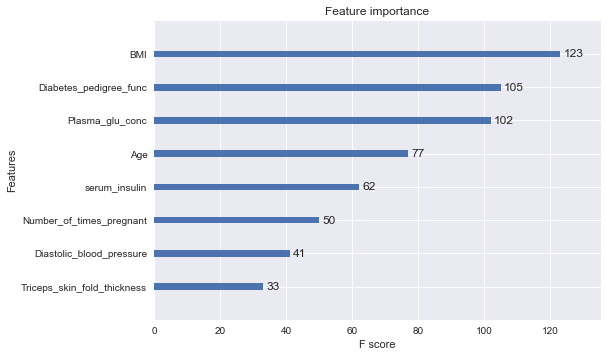

In [46]:
xgb.plot_importance(model)

# Hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [48]:
model = xgb.XGBClassifier()

In [49]:
learning_rate = [0.0001,0.001,0.01,0.1,0.2,0.3]

In [50]:
param_grid = dict(learning_rate=learning_rate)

In [51]:
Kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=7)

In [52]:
grid_search = GridSearchCV(model,param_grid=param_grid,scoring='neg_log_loss',n_jobs=-1,cv=Kfold)

In [53]:
grid_result = grid_search.fit(X,y)

In [54]:
print('Best {} using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best -0.4819227667598872 using {'learning_rate': 0.1}


In [55]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [57]:
for mean, stdev, par in zip(means,stds,params):
    print('{}{}with{}'.format(mean,stdev,par))

-0.68970687689339790.00048310496739601447with{'learning_rate': 0.0001}
-0.66077458842947710.0035399971627720233with{'learning_rate': 0.001}
-0.52719657292111130.023429870884967972with{'learning_rate': 0.01}
-0.48192276675988720.06229097018588829with{'learning_rate': 0.1}
-0.51346282715966250.0765546241664097with{'learning_rate': 0.2}
-0.56349394479178720.09210965077189175with{'learning_rate': 0.3}
